In [1]:
import numpy as np
import imageio
from matplotlib import pyplot as plt
import json

In [2]:
def png_to_dataset(png, resolution):
    emojis = []
    height, width, _ = png.shape
    for i in range(1, height, resolution+2):
        for j in range(1, width, resolution+2):
            emoji = png[j:j+resolution, i:i+resolution]
            if np.max(emoji[:, :, -1] != 0):
                emojis.append(emoji)
    return np.array(emojis)

In [43]:
base_filepath = 'img/sheet'
companies = ['apple', 'facebook', 'google', 'messenger', 'twitter']
np.save(open('companies.npy', 'wb'), companies)

resolutions = [16, 20, 32, 64]
n = 52*52*len(companies)

In [44]:
for resolution in resolutions:
    emojis_dataset = []
    for company in companies:
        emojis_png = imageio.imread(base_filepath + '_' + company + '_' + str(resolution) + '.png')
        dataset_from_png = png_to_dataset(emojis_png, resolution)
        emojis_dataset.append(dataset_from_png)
            
    emojis_dataset = np.array(emojis_dataset)
    emojis_dataset = emojis_dataset / 255.0
    emojis_dataset = emojis_dataset * 2 - 1
    np.save(open('emojis' + '_' + str(resolution) + '.npy', 'wb'), emojis_dataset)

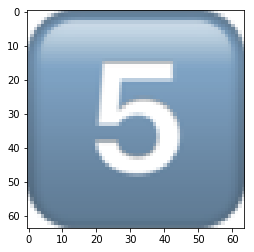

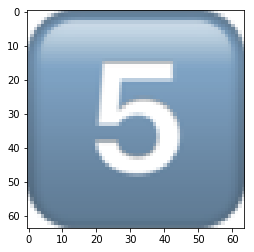

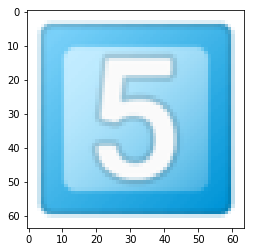

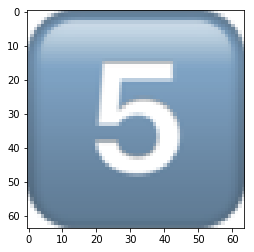

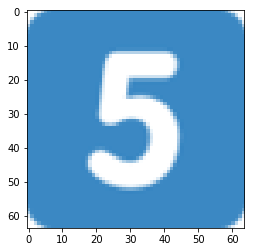

In [45]:
for i in range(len(companies)):
    plt.imshow((emojis_dataset[i, 7, :, :, :] + 1) / 2)
    plt.show()

# Dataset with classes

In [18]:
base_filepath = 'img/sheet'
resolutions = [16, 20, 32, 64]
companies = ['google', 'apple', 'twitter', 'facebook']

categories_data = json.load(open('categories.json', 'r'))
categories_names = list(categories_data.keys())
emoji_data = json.load(open('emoji.json', 'r'))

np.save(open('companies_names.npy', 'wb'), np.array(companies))
np.save(open('categories_names.npy', 'wb'), np.array(categories_names))


for resolution in resolutions:
    dataset = []
    classes = []
    
    companies_pngs = []
    for company in companies:
        companies_pngs.append(imageio.imread(base_filepath + '_' + company + '_' + str(resolution) + '.png'))

    for element in emoji_data:
        valid = True
        for company in companies:
            if not element['has_img_' + company]:
                valid = False
                break
        if valid:
            y = element['sheet_x']
            x = element['sheet_y']
            category = element['category']

            base_x = 1 + x * (2 + resolution)
            base_y = 1 + y * (2 + resolution)
            
            for company in companies:
                company_index = companies.index(company)
                category_index = categories_names.index(category)
                
                emoji = companies_pngs[company_index][base_x:base_x + resolution, base_y:base_y + resolution, :]
                dataset.append(emoji)
                classes.append([company_index, category_index])
    dataset = np.array(dataset)
    dataset = dataset / 255.0
    dataset = dataset * 2 - 1
    
    classes = np.array(classes)
    
    np.save(open('emojis_' + str(resolution) + '.npy', 'wb'), dataset)
    np.save(open('emojis_classes' + '.npy', 'wb'), classes)

In [21]:
dataset = (dataset + 1) / 2

2427
Smileys & People
facebook


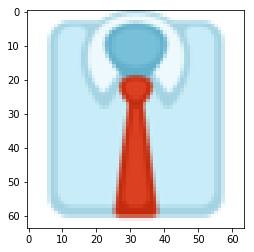

In [46]:
i = np.random.randint(0, dataset.shape[0])
print(i)
plt.imshow(dataset[i])
print(categories_names[classes[i][1]])
print(companies[classes[i][0]])